<a href="https://colab.research.google.com/github/nguyenthekhoig7/Predict-Using-Linear-Regression-ML-Model/blob/main/Predict%20Using%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#data source: https://www.kaggle.com/spscientist/students-performance-in-exams
URL = "https://drive.google.com/file/d/1WAmPgaii2jKwdpVjQYlb_U4WExWeuMd5/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df = df.drop(["reading score", "writing score"], axis=1)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


In [ ]:
df.describe()

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


###**Data cleaning up**

In [ ]:
# encode categorical columns with quantitative values
cleanup_col = {"gender": {"female": 0, "male": 1},
              "parental level of education": {"some high school": 0, "high school": 0.2, 
                                               "some college": 0.4, "associate's degree": 0.6,
                                               "bachelor's degree": 0.8,"master's degree": 1},
               
               "lunch": {"free/reduced": 0,	"standard": 1},
               "test preparation course": {"none": 0, "completed": 1}
               }
df = df.replace(cleanup_col)
# df.head(10)

In [ ]:
# encode categorical columns with quantitative values
df = pd.get_dummies(df, columns=["race/ethnicity"], prefix=["ethicity"])
df.head(10)

In [ ]:
y = df["math score"]
x = df.drop(["math score"], axis=1)
x.head()

,gender,parental level of education,lunch,test preparation course,ethicity_group A,ethicity_group B,ethicity_group C,ethicity_group D,ethicity_group E
0,0,0.8,1,0,0,1,0,0,0
1,0,0.4,1,1,0,0,1,0,0
2,0,1.0,1,0,0,1,0,0,0
3,1,0.6,0,0,1,0,0,0,0
4,1,0.4,1,0,0,0,1,0,0


In [ ]:
test_size = 0.33
seed=6
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=test_size, random_state=seed)

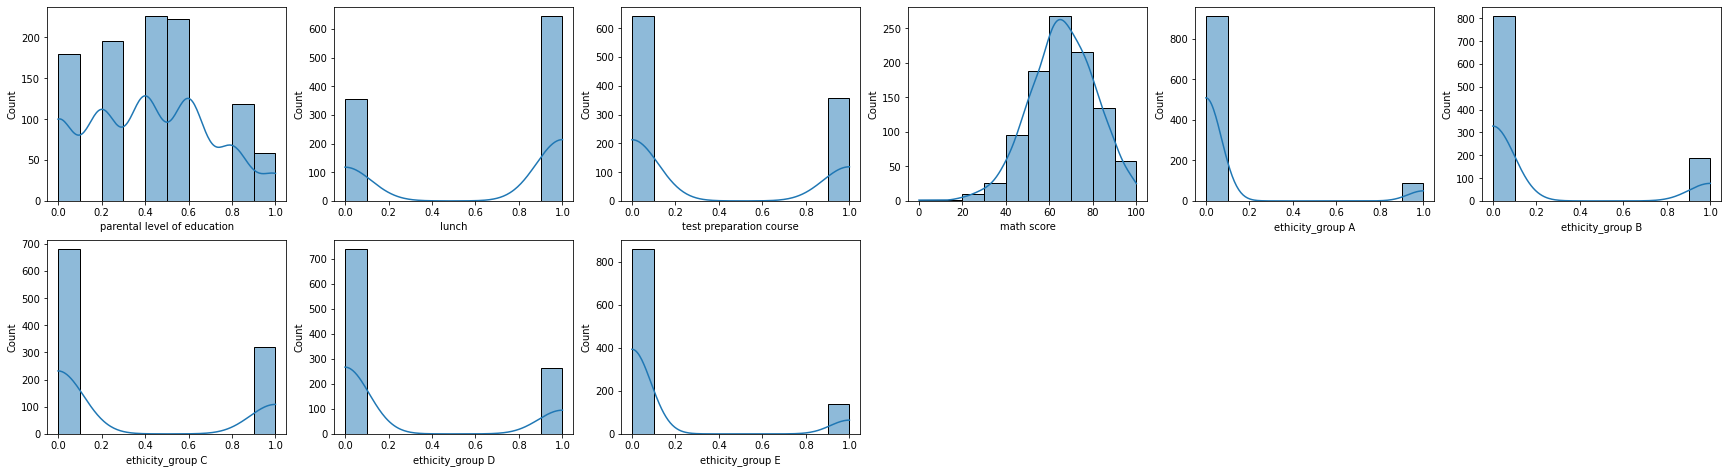

In [ ]:
plt.figure(figsize=(30,25))
for i in range(1, len(df.columns)):
    plt.subplot(6, 6, i)
    sns.histplot(data=df, x=df.columns[i], kde=True, bins=10)
plt.show()

###**Predict Using Linear Regression**

In [ ]:
# Use Linear regression algo to predict
model = LinearRegression()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)

In [ ]:
print(mean_squared_error(y_test, model_pred))

189.23814216382576
